In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import DBSCAN,KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import MDS
import matplotlib
import matplotlib.pyplot as plt

In [3]:
TrainSet1 = pd.read_csv('DataSetKMeans1.csv',encoding='gbk')
fin_type = TrainSet1.iloc[:,-1].unique()
BSSID_type = TrainSet1.iloc[:,0].unique()
Room_type = TrainSet1.iloc[:,2].unique()

方案一：对于每个finLabel，将不存在的RBSSIDLabel对应的RSSLabel设置为-100
方案二：将不纯在的的设置为0，存在的设置为1，

# 方案一

In [4]:
fin = {}
BSSID_list = np.asarray([-100 for i in range(len(BSSID_type))])
for fin_i in fin_type:
    indexx = []
    TD_index = pd.Index(TrainSet1.iloc[:,-1])
    sliced_TD = TrainSet1[TD_index.get_loc(fin_i)]
    for i in sliced_TD.iloc[:,0]:
        index = pd.Index(BSSID_type).get_loc(i)
        #indexx.extend([index])
        indexx.append(index)
    BSSID_list[np.asarray(indexx)] = TrainSet1.iloc[np.asarray(indexx),1]
    fin[fin_i] = []
    fin[fin_i].extend(BSSID_list.tolist())
    # add label at the end
    fin[fin_i].extend([sliced_TD.iloc[0,2]]) 
fin = pd.DataFrame(fin).T

In [5]:
m = pd.DataFrame(fin)
m.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
1,-56,-69,-69,-71,-80,-86,-86,-86,-70,-65,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,1
2,-56,-69,-69,-71,-80,-86,-86,-86,-70,-65,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,1
3,-56,-69,-69,-71,-80,-86,-86,-86,-70,-65,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,1
4,-56,-69,-69,-71,-80,-86,-86,-86,-70,-65,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,1
5,-56,-69,-69,-71,-80,-86,-86,-86,-70,-65,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,1


In [6]:
m = m.apply(lambda x: (x - x.mean())  / (x.std()))
m = m.fillna(0)
m.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.39301,-0.39301,-0.39301,-0.387837,-0.292968,-0.292968,-0.210832,-0.194574,-0.167712,-1.363939
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.39301,-0.39301,-0.39301,-0.387837,-0.292968,-0.292968,-0.210832,-0.194574,-0.167712,-1.363939
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.39301,-0.39301,-0.39301,-0.387837,-0.292968,-0.292968,-0.210832,-0.194574,-0.167712,-1.363939
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.39301,-0.39301,-0.39301,-0.387837,-0.292968,-0.292968,-0.210832,-0.194574,-0.167712,-1.363939
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.39301,-0.39301,-0.39301,-0.387837,-0.292968,-0.292968,-0.210832,-0.194574,-0.167712,-1.363939


In [7]:
X = np.array(m)
km = KMeans(n_clusters=8, random_state=0).fit(X)
#km = DBSCAN(eps=3).fit(X)
labels = km.labels_
#
k1 = km.fit_transform(X)
sk.metrics.davies_bouldin_score(k1, labels)

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.4335356580135836

In [8]:
# 3D
#embedding = MDS(n_components=3)
# 2D
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(k1[:500])
X_transformed.shape

(328, 2)

In [9]:
sk.metrics.davies_bouldin_score(X_transformed, labels)

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.47141455206766353

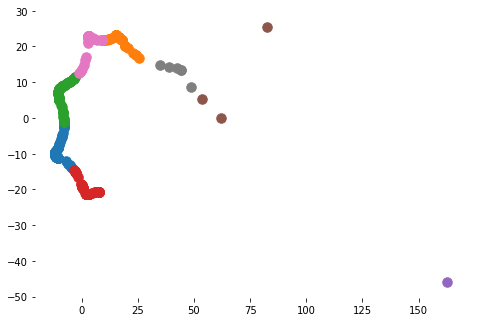

In [10]:
fig = plt.figure()
# 3D

#ax = fig.add_subplot(111, projection='3d')
rect=[0.0,0.0,1.0,1.0]
# 2D
ax=fig.add_axes(rect, label='ax1', frameon=False)  
scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']

# 3D
'''
for i in np.unique(labels):
    a = np.where(labels == i)
    ax.scatter(X_transformed[a,0],X_transformed[a,1],X_transformed[a,2],marker='o', s=90)
# 2D
'''
for i in np.unique(labels):
    a = np.where(labels == i)
    ax.scatter(X_transformed[a,0],X_transformed[a,1],marker='o', s=90)

plt.show()

# 方案二

1. one-hot处理 

得到fin特征矩阵

In [13]:
fin = {}
BSSID_list = np.asarray([0 for i in range(len(BSSID_type))])
#BSSID_list = [0 for i in range(len(BSSID_type))]
for fin_i in fin_type:
    indexx = []
    TD_index = pd.Index(TrainSet1.iloc[:,-1])
    sliced_TD = TrainSet1[TD_index.get_loc(fin_i)]
    for i in sliced_TD.iloc[:,0]:
        index = pd.Index(BSSID_type).get_loc(i)
        #indexx.extend([index])
        indexx.append(index)
    BSSID_list[np.asarray(indexx)] = 1 
    fin[fin_i] = []
    fin[fin_i].extend(BSSID_list.tolist())
    # add label at the end
    fin[fin_i].extend([sliced_TD.iloc[0,2]]) 
fin = pd.DataFrame(fin).T

In [15]:
km =KMeans(n_clusters=8, random_state=0).fit(X)
#km = DBSCAN(eps=3).fit(X)
labels = km.labels_
Data = km.transform(X)
sk.metrics.davies_bouldin_score(Data, labels)

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.4335356580135836

In [16]:
labels

array([4, 5, 5, 5, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [19]:
# 3D
embedding = MDS(n_components=3)
X_transformed = embedding.fit_transform(Data[:500])
X_transformed.shape


(328, 3)

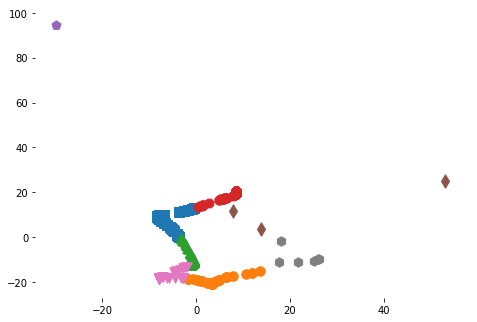

In [20]:
fig = plt.figure()
# 3D
from mpl_toolkits.mplot3d import Axes3D
#ax = fig.add_subplot(111, projection='3d')
rect=[0.0,0.0,1.0,1.0]
# 2D
ax=fig.add_axes(rect, label='ax1', frameon=False)  
scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
'''
# 3D
for i in np.unique(labels):
    a = np.where(labels == i)
    ax.scatter(X_transformed[a,0],X_transformed[a,1],X_transformed[a,2],marker=scatterMarkers[i], s=90)
# 2D
'''
for i in np.unique(labels):
    a = np.where(labels == i)
    ax.scatter(X_transformed[a,0],X_transformed[a,1],marker=scatterMarkers[i], s=90)

plt.show()

# 方案二 done

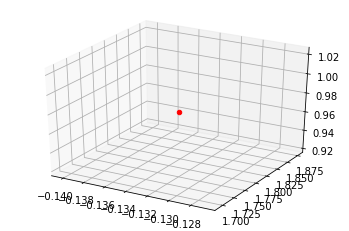

In [204]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[0,0], a[0,1], a[0,2], c='r', marker='o')

In [203]:
a[0,2]

0.9713651385970709

In [212]:
scatterMarkers[ labels % len(scatterMarkers)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [133]:
import sklearn as sk
from sklearn.cluster import DBSCAN,KMeans

In [201]:
a = np.random.randn(3,3)
a

array([[-0.13348183,  1.78566308,  0.97136514],
       [ 0.54869273,  1.31471296,  0.20482077],
       [-0.30254029, -1.33068105,  0.99098918]])

In [132]:
X = np.array(fin)

In [187]:
a = np.where(labels == 0)
a1 = np.where(labels == 1)
a2 = np.where(labels == 2)
a3 = np.where(labels == 3)
a4 = np.where(labels == 4)
a5 = np.where(labels == 5)
a6 = np.where(labels == 6)
a7 = np.where(labels == 7)

------------------------------------------------------------

In [94]:
'''
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                      int(km.labels_[i]))))'''
km.predict(X_transformed)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

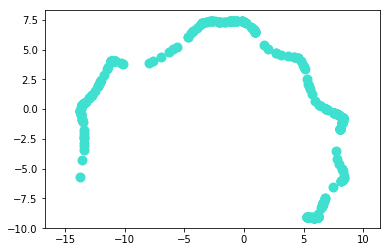

In [82]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='turquoise', s=100, lw=0, label='MDS')
plt.axis('equal');

In [98]:
km.labels_

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [59]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
km = model.fit_transform(X)
plt.scatter(km[:, 0], km[:, 1], **colorize)
plt.axis('equal');

ValueError: array must be 2-dimensional and square. shape = (328, 267)

In [40]:
clustering = DBSCAN(eps=3).fit(X)

In [41]:
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [42]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [60]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [61]:
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)

In [63]:
X_true = X_true.reshape((n_samples, 2))

In [64]:
X_true.shape

(20, 2)